In [9]:
#Importing Libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_US = df[((df['job_title'] == 'Data Analyst')&(df['job_country'] == 'United States'))]

In [6]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame

job_location
Anywhere           907
New York, NY       701
Chicago, IL        554
Atlanta, GA        531
Dallas, TX         407
Austin, TX         379
Washington, DC     348
Tampa, FL          338
Charlotte, NC      319
Los Angeles, CA    270
Name: count, dtype: int64

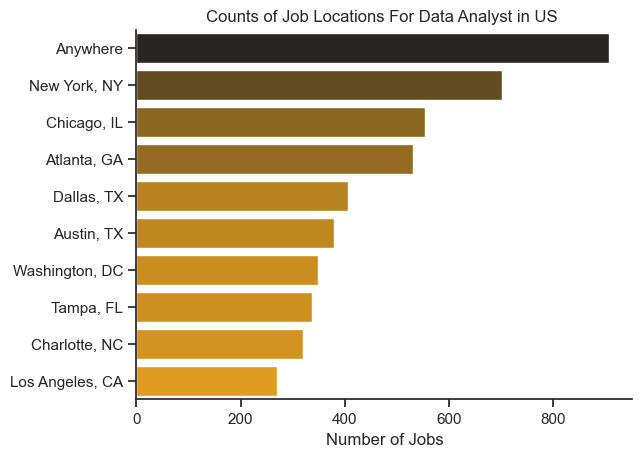

In [35]:
sns.set_theme(style="ticks")
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.barplot(x='count', y='job_location', data=df_plot , hue= 'count' , palette='dark:orange_r',legend=False)  
sns.despine()
plt.title('Counts of Job Locations For Data Analyst in US ')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

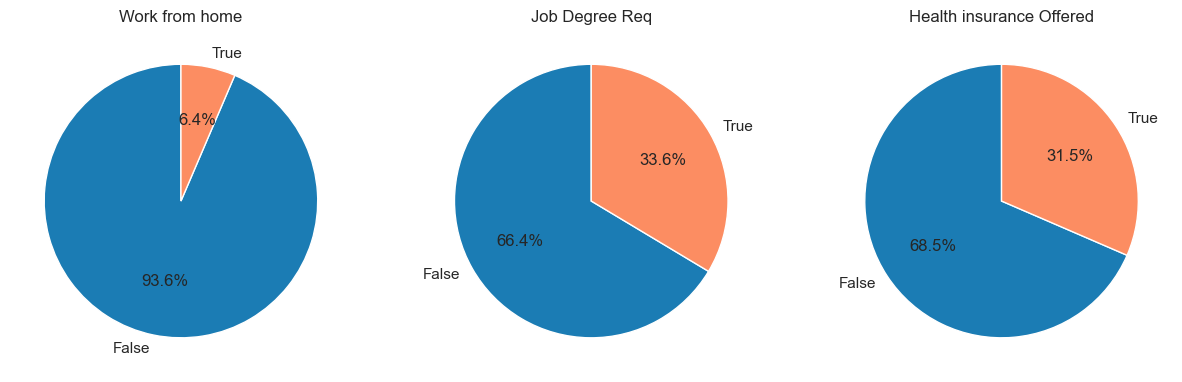

In [37]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))

dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health insurance Offered'
}

for  i, (column,title) in enumerate(dict_column.items()):
    
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels = ['False','True'], colors=["#1b7cb4", '#fc8d62'])
    ax[i].set_title(title)
    ax[i].set_ylabel('')    

plt.show()

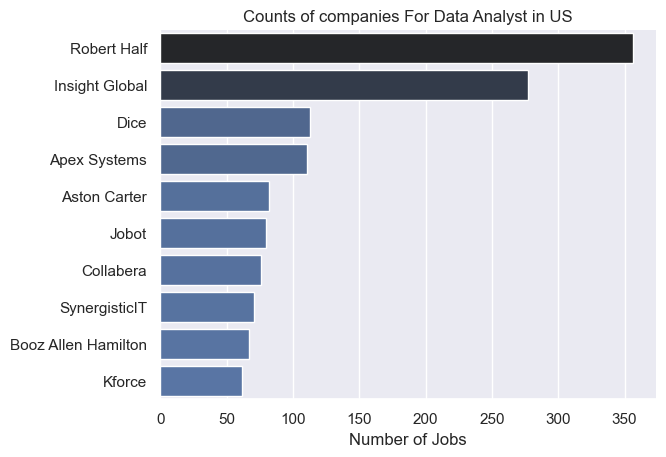

In [38]:
sns.set_theme()
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.barplot(x='count', y='company_name', data=df_plot ,legend =False, hue= 'count' , palette='dark:b_r')
sns.despine()
plt.title('Counts of companies For Data Analyst in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()